**Preamble**

This is a **group** assignment. Please indicate the names of all group members below. 
Each group is to comprise *four* to *five* members.

If the group obtains a solution through research (e.g., on the web), then the group is to acknowledge the source, but *write up the solution in their OWN WORDS*.

In [1]:
# Marks 
# DO NOT CHANGE THIS

parts    = ['(a)    ', '(b)    ', '(c.i)  ', '(c.ii) ']
score    = [0,0,0,0]
maxscore = [5,5,5,5]

numparts = len(parts)

for i in range(numparts):
    print("score for {}: {} out of {}".format(parts[i], score[i], maxscore[i]))
print()
print("total score      : {} out of {}".format(sum(score),sum(maxscore)))

score for (a)    : 0 out of 5
score for (b)    : 0 out of 5
score for (c.i)  : 0 out of 5
score for (c.ii) : 0 out of 5

total score      : 0 out of 20


# Traveling Salesperson Problem (TSP)

Assignment objectives:

i. Using PuLP, branch-and-bound and 'subtour constraints' techniques, implement routines to solve small TSP instances.

ii. By modifying the routines, obtain tight estimates on two moderate TSP instances.

---
## Branch-and-Bound

**(a) (5 marks)** 

**(a.i)** Implement a routine in PuLP that solves a TSP-LP relaxation problem that *fixes the values of certain variables*.

Specifically, your routine should take as 

**inputs:**

- a list of `cities`,
- a distance dictionary `dist`,
- a list of roads `R0` whose values are fixed to be *zero* in the solution,
- a list of roads `R1` whose values are fixed to be *one* in the solution.

and **output** the solution to the following linear program:

$$
\begin{array}{crcll}
\min &\sum_{i<j} c_{ij}x_{ij}  \\ 
\text{subject to} 
& \sum_{j<i}x_{ji} + \sum_{i<j}x_{ij} & = 2 &\text{ for each city }i\\ 
& x_{ij} & =0 & \text{ for each road}(i,j)\in R_0\\ 
& x_{ij} & =1 & \text{ for each road}(i,j)\in R_1\\ 
& x_{ij}\text{'s} & \ge 0\\ 
\end{array}
$$


**Notes**:
- <font color='red'>You are **not** to set the variable category to `cat='Integer'` nor  `cat='Binary'`.</font> 
- Your routine should return the value `20` for the following instance. 


In [31]:
cities = [1,2,3,4,5,6]
dist = {
               (1,2): 4, (1,3): 3,  (1,4): 7, (1,5): 7, (1,6): 6,
    (2,1): 4,            (2,3): 2,  (2,4): 5, (2,5): 7, (2,6): 7,
    (3,1): 3,  (3,2): 2,            (3,4): 8, (3,5): 6, (3,6): 6,
    (4,1): 7,  (4,2): 5, (4,3): 5,            (4,5): 3, (4,6): 5,
    (5,1): 7,  (5,2): 7, (5,3): 6,  (5,4): 3,           (5,6): 3, 
    (6,1): 6,  (6,2): 7, (6,3): 6,  (6,4): 5, (6,5): 3,
}

R0 = [(1,6)]
R1 = [(1,2)]

In [32]:
import pulp

model = pulp.LpProblem("LPa", pulp.LpMinimize)
variable = {}
x = []

for i in range(1,len(cities)+1):
    for j in range(i+1,len(cities)+1):
        variable[(i,j)] = pulp.LpVariable('x'+'_'+str(i)+'_'+str(j), lowBound=0)
        x.append((i,j))      
        #print((i,j),'x'+str(i)+str(j))
        
#print(x)      
model += pulp.lpSum(variable[i] * dist[i] for i in x), "Z"

for i in range(1,len(cities)+1):
    y = []
    for j in range(1,len(cities)+1):
        if i == j:
            continue
        elif i > j:
            y.append((j,i))
        else:
            y.append((i,j))
    model += pulp.lpSum(variable[i] for i in y) == 2, "constraint%s"%i

# empty list check    
if R0:
    for i in range(len(R0)):
        model += variable[R0[i]] == 0, "constraint%s"%(i+len(cities)+1)
    
if R1:
    for i in range(len(R1)):
        model += variable[R1[i]] == 1, "constraint%s"%(i+len(cities)+len(R0)+1)

print(model)       

#print(variable, type(variable[(1,2)]))

model.solve()
print("Z  : {}".format(pulp.value(model.objective)))
for i in range(1,len(cities)+1):
    for j in range(i+1,len(cities)+1):
        print('x'+'_'+str(i)+'_'+str(j)+" : {}".format(variable[(i,j)].varValue))

LPa:
MINIMIZE
4*x_1_2 + 3*x_1_3 + 7*x_1_4 + 7*x_1_5 + 6*x_1_6 + 2*x_2_3 + 5*x_2_4 + 7*x_2_5 + 7*x_2_6 + 8*x_3_4 + 6*x_3_5 + 6*x_3_6 + 3*x_4_5 + 5*x_4_6 + 3*x_5_6 + 0
SUBJECT TO
constraint1: x_1_2 + x_1_3 + x_1_4 + x_1_5 + x_1_6 = 2

constraint2: x_1_2 + x_2_3 + x_2_4 + x_2_5 + x_2_6 = 2

constraint3: x_1_3 + x_2_3 + x_3_4 + x_3_5 + x_3_6 = 2

constraint4: x_1_4 + x_2_4 + x_3_4 + x_4_5 + x_4_6 = 2

constraint5: x_1_5 + x_2_5 + x_3_5 + x_4_5 + x_5_6 = 2

constraint6: x_1_6 + x_2_6 + x_3_6 + x_4_6 + x_5_6 = 2

constraint7: x_1_6 = 0

constraint8: x_1_2 = 1

VARIABLES
x_1_2 Continuous
x_1_3 Continuous
x_1_4 Continuous
x_1_5 Continuous
x_1_6 Continuous
x_2_3 Continuous
x_2_4 Continuous
x_2_5 Continuous
x_2_6 Continuous
x_3_4 Continuous
x_3_5 Continuous
x_3_6 Continuous
x_4_5 Continuous
x_4_6 Continuous
x_5_6 Continuous

Z  : 20.0
x_1_2 : 1.0
x_1_3 : 1.0
x_1_4 : 0.0
x_1_5 : 0.0
x_1_6 : 0.0
x_2_3 : 1.0
x_2_4 : 0.0
x_2_5 : 0.0
x_2_6 : 0.0
x_3_4 : 0.0
x_3_5 : 0.0
x_3_6 : 0.0
x_4_5 : 1.0
x_4_6 :

**(a.ii)** Using the routine in (a.i), apply Branch-and-Bound techniques to solve the following TSP instance on six cities.

**Notes**:
- You are **not** to set the variable category to `cat='Integer'`  nor  `cat='Binary'`. 
- To demonstrate your solution, you only need to *display the Branch-and-Bound tree*. For each node, you need to show the following information.
    - The optimal value of the LP-relaxation.
    - The optimal solution of the LP-relaxation.
    - If you bound at the node, why you bound.
    - If you branch at the node, the labels of the branches.
- You need **not** automate the process of branch-and-bound. However, you are required to plot / draw the branch-and-bound tree. Here, you can plot using `Pyplot` or some simple drawing software, like powerpoint, or simply draw by hand. You can supplement your diagram with the steps to build the tree. 
- The shortest TSP tour has length **22**.

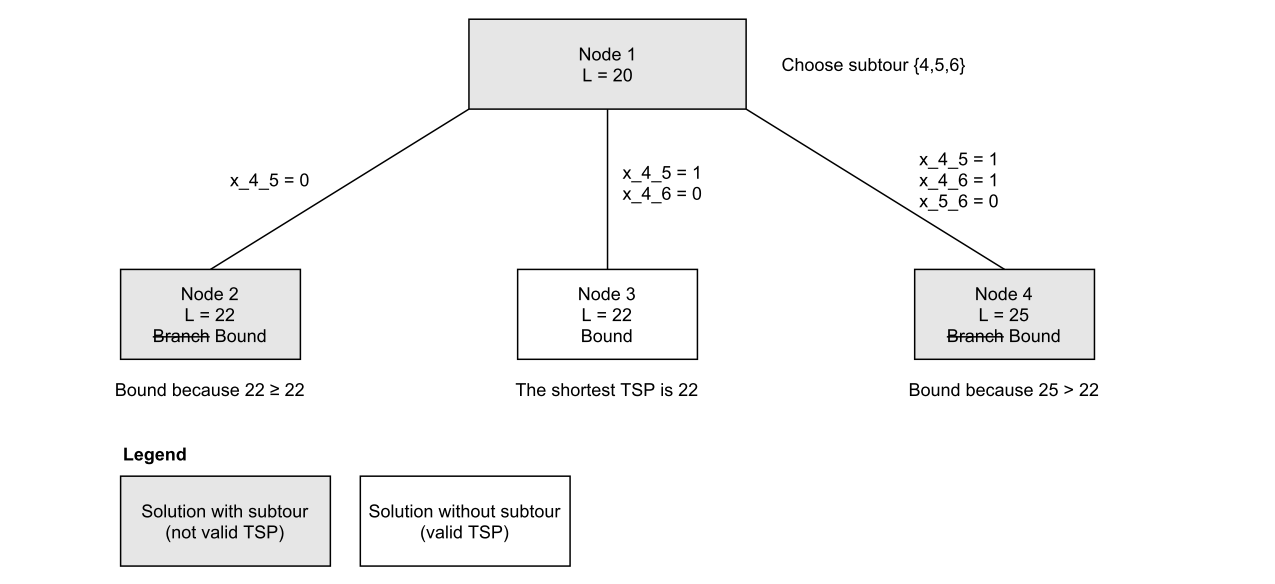

In [33]:
cities = [1,2,3,4,5,6]
dist = {
               (1,2): 4, (1,3): 3,  (1,4): 7, (1,5): 7, (1,6): 6,
    (2,1): 4,            (2,3): 2,  (2,4): 5, (2,5): 7, (2,6): 7,
    (3,1): 3,  (3,2): 2,            (3,4): 8, (3,5): 6, (3,6): 6,
    (4,1): 7,  (4,2): 5, (4,3): 5,            (4,5): 3, (4,6): 5,
    (5,1): 7,  (5,2): 7, (5,3): 6,  (5,4): 3,           (5,6): 3, 
    (6,1): 6,  (6,2): 7, (6,3): 6,  (6,4): 5, (6,5): 3,
}

import pulp as pulp

R0 = [(4,6)]
R1 = [(4,5)]

model = pulp.LpProblem("LPa", pulp.LpMinimize)
variable = {}
x = []

for i in range(1,len(cities)+1):
    for j in range(i+1,len(cities)+1):
        variable[(i,j)] = pulp.LpVariable('x'+'_'+str(i)+'_'+str(j), lowBound=0)
        x.append((i,j))      
        #print((i,j),'x'+str(i)+str(j))
        
#print(x)      
model += pulp.lpSum(variable[i] * dist[i] for i in x), "Z"

for i in range(1,len(cities)+1):
    y = []
    for j in range(1,len(cities)+1):
        if i == j:
            continue
        elif i > j:
            y.append((j,i))
        else:
            y.append((i,j))
    model += pulp.lpSum(variable[i] for i in y) == 2, "constraint%s"%i

# empty list check    
if R0:
    for i in range(len(R0)):
        model += variable[R0[i]] == 0, "constraint%s"%(i+len(cities)+1)
    
if R1:
    for i in range(len(R1)):
        model += variable[R1[i]] == 1, "constraint%s"%(i+len(cities)+len(R0)+1)

print(model)       

model.solve()
print("Z  : {}".format(pulp.value(model.objective)))
for i in range(1,len(cities)+1):
    for j in range(i+1,len(cities)+1):
        print('x'+'_'+str(i)+'_'+str(j)+" : {}".format(variable[(i,j)].varValue))

LPa:
MINIMIZE
4*x_1_2 + 3*x_1_3 + 7*x_1_4 + 7*x_1_5 + 6*x_1_6 + 2*x_2_3 + 5*x_2_4 + 7*x_2_5 + 7*x_2_6 + 8*x_3_4 + 6*x_3_5 + 6*x_3_6 + 3*x_4_5 + 5*x_4_6 + 3*x_5_6 + 0
SUBJECT TO
constraint1: x_1_2 + x_1_3 + x_1_4 + x_1_5 + x_1_6 = 2

constraint2: x_1_2 + x_2_3 + x_2_4 + x_2_5 + x_2_6 = 2

constraint3: x_1_3 + x_2_3 + x_3_4 + x_3_5 + x_3_6 = 2

constraint4: x_1_4 + x_2_4 + x_3_4 + x_4_5 + x_4_6 = 2

constraint5: x_1_5 + x_2_5 + x_3_5 + x_4_5 + x_5_6 = 2

constraint6: x_1_6 + x_2_6 + x_3_6 + x_4_6 + x_5_6 = 2

constraint7: x_4_6 = 0

constraint8: x_4_5 = 1

VARIABLES
x_1_2 Continuous
x_1_3 Continuous
x_1_4 Continuous
x_1_5 Continuous
x_1_6 Continuous
x_2_3 Continuous
x_2_4 Continuous
x_2_5 Continuous
x_2_6 Continuous
x_3_4 Continuous
x_3_5 Continuous
x_3_6 Continuous
x_4_5 Continuous
x_4_6 Continuous
x_5_6 Continuous

Z  : 22.0
x_1_2 : 0.0
x_1_3 : 1.0
x_1_4 : 0.0
x_1_5 : 0.0
x_1_6 : 1.0
x_2_3 : 1.0
x_2_4 : 1.0
x_2_5 : 0.0
x_2_6 : 0.0
x_3_4 : 0.0
x_3_5 : 0.0
x_3_6 : 0.0
x_4_5 : 1.0
x_4_6 :

---
## Subtour Constraints

**(b) (5 marks)** 

**(b.i)** Implement a routine in PuLP that solves a TSP-LP relaxation problem that includes *subtour constraints*.

Specifically, your routine should take as 

**inputs:**

- a list of `cities`,
- a distance dictionary `dist`,
- a list of subtours `SS`,

and **output** the solution to the following linear program:

$$
\begin{array}{crcll}
\min &\sum_{i<j} c_{ij}x_{ij}  \\ 
\text{subject to} 
& \sum_{j<i}x_{ji} + \sum_{i<j}x_{ij} & = 2 &\text{ for each city }i\\ 
& \sum_{i<j, i\in S, j \notin S} x_{ij} + \sum_{i<j, i\notin S, j \in S} x_{ij}& \ge 2 & \text{ for subtour }S\in SS\\ 
& x_{ij}\text{'s} & \ge 0\\ 
\end{array}
$$

**Notes**:
- You are **not** to set the variable category to `cat='Integer'`  nor  `cat='Binary'`. 
- Your routine should return the value `20` for the following instance. 


In [34]:
cities = [1,2,3,4,5,6]
dist = {
               (1,2): 4, (1,3): 3,  (1,4): 7, (1,5): 7, (1,6): 6,
    (2,1): 4,            (2,3): 2,  (2,4): 5, (2,5): 7, (2,6): 7,
    (3,1): 3,  (3,2): 2,            (3,4): 8, (3,5): 6, (3,6): 6,
    (4,1): 7,  (4,2): 5, (4,3): 5,            (4,5): 3, (4,6): 5,
    (5,1): 7,  (5,2): 7, (5,3): 6,  (5,4): 3,           (5,6): 3, 
    (6,1): 6,  (6,2): 7, (6,3): 6,  (6,4): 5, (6,5): 3,
}

SS = [ 
    [1,2,6] 
 ]

In [39]:
import pulp

model = pulp.LpProblem("LPb", pulp.LpMinimize)
variable = {}
x = []

for i in range(1,len(cities)+1):
    for j in range(i+1,len(cities)+1):
        variable[(i,j)] = pulp.LpVariable('x'+'_'+str(i)+'_'+str(j), lowBound=0)
        x.append((i,j))      
        #print((i,j),'x'+str(i)+str(j))
        
#print(x)      
model += pulp.lpSum(variable[i] * dist[i] for i in x), "Z"

for i in range(1,len(cities)+1):
    y = []
    for j in range(1,len(cities)+1):
        if i == j:
            continue
        elif i > j:
            y.append((j,i))
        else:
            y.append((i,j))
    model += pulp.lpSum(variable[i] for i in y) == 2, "constraint%s"%i
    
if SS:
    for i in range(len(SS)):
        z = []
        for j in SS[i]:
            for k in [l for l in cities if l not in SS[i]]:
                #print(j,k)
                if k > j:
                    z.append((j,k))
                else:
                    z.append((k,j))
        model += pulp.lpSum(variable[i] for i in z) >= 2, "constraint%s"%(i+len(cities)+1)

print(model)

model.solve()
print("Z  : {}".format(pulp.value(model.objective)))
for i in range(1,len(cities)+1):
    for j in range(i+1,len(cities)+1):
        print('x'+'_'+str(i)+'_'+str(j)+" : {}".format(variable[(i,j)].varValue))

LPb:
MINIMIZE
4*x_1_2 + 3*x_1_3 + 7*x_1_4 + 7*x_1_5 + 6*x_1_6 + 2*x_2_3 + 5*x_2_4 + 7*x_2_5 + 7*x_2_6 + 8*x_3_4 + 6*x_3_5 + 6*x_3_6 + 3*x_4_5 + 5*x_4_6 + 3*x_5_6 + 0
SUBJECT TO
constraint1: x_1_2 + x_1_3 + x_1_4 + x_1_5 + x_1_6 = 2

constraint2: x_1_2 + x_2_3 + x_2_4 + x_2_5 + x_2_6 = 2

constraint3: x_1_3 + x_2_3 + x_3_4 + x_3_5 + x_3_6 = 2

constraint4: x_1_4 + x_2_4 + x_3_4 + x_4_5 + x_4_6 = 2

constraint5: x_1_5 + x_2_5 + x_3_5 + x_4_5 + x_5_6 = 2

constraint6: x_1_6 + x_2_6 + x_3_6 + x_4_6 + x_5_6 = 2

constraint7: x_1_4 + x_1_5 + x_1_6 + x_2_4 + x_2_5 + x_2_6 + x_3_4 + x_3_5
 + x_3_6 >= 2

constraint8: x_1_2 + x_1_4 + x_1_5 + x_1_6 + x_2_3 + x_3_4 + x_3_5 + x_3_6
 >= 2

VARIABLES
x_1_2 Continuous
x_1_3 Continuous
x_1_4 Continuous
x_1_5 Continuous
x_1_6 Continuous
x_2_3 Continuous
x_2_4 Continuous
x_2_5 Continuous
x_2_6 Continuous
x_3_4 Continuous
x_3_5 Continuous
x_3_6 Continuous
x_4_5 Continuous
x_4_6 Continuous
x_5_6 Continuous

Z  : 22.0
x_1_2 : 0.0
x_1_3 : 1.0
x_1_4 : 0.0
x_1

**(b.ii)** Using the routine in (b.i), introduce a set of subtour constraints to solve the following TSP instance on six cities.

**Notes**:
- <font color='red'>You are **not** to set the variable category to `cat='Integer'`  nor  `cat='Binary'`.</font> 
- To demonstrate your solution, you only need to *display the final set of subtour constraints*.
- You need **not** automate the process of finding subtour constraints.
- The shortest TSP tour has length 22.

In [38]:
cities = [1,2,3,4,5,6]
dist = {
               (1,2): 4, (1,3): 3,  (1,4): 7, (1,5): 7, (1,6): 6,
    (2,1): 4,            (2,3): 2,  (2,4): 5, (2,5): 7, (2,6): 7,
    (3,1): 3,  (3,2): 2,            (3,4): 8, (3,5): 6, (3,6): 6,
    (4,1): 7,  (4,2): 5, (4,3): 5,            (4,5): 3, (4,6): 5,
    (5,1): 7,  (5,2): 7, (5,3): 6,  (5,4): 3,           (5,6): 3, 
    (6,1): 6,  (6,2): 7, (6,3): 6,  (6,4): 5, (6,5): 3,
}

import pulp

SS = [ 
    [1,2,3],[1,3]
 ]

model = pulp.LpProblem("LPc1", pulp.LpMinimize)
variable = {}
x = []

for i in range(1,len(cities)+1):
    for j in range(i+1,len(cities)+1):
        variable[(i,j)] = pulp.LpVariable('x'+'_'+str(i)+'_'+str(j), lowBound=0)
        x.append((i,j))      
        #print((i,j),'x'+str(i)+str(j))
        
#print(x)      
model += pulp.lpSum(variable[i] * dist[i] for i in x), "Z"

for i in range(1,len(cities)+1):
    y = []
    for j in range(1,len(cities)+1):
        if i == j:
            continue
        elif i > j:
            y.append((j,i))
        else:
            y.append((i,j))
    model += pulp.lpSum(variable[i] for i in y) == 2, "constraint%s"%i
    
if SS:
    for i in range(len(SS)):
        z = []
        for j in SS[i]:
            for k in [l for l in cities if l not in SS[i]]:
                #print(j,k)
                if k > j:
                    z.append((j,k))
                else:
                    z.append((k,j))
        model += pulp.lpSum(variable[i] for i in z) >= 2, "constraint%s"%(i+len(cities)+1)

print(model)

model.solve()
print("Z  : {}".format(pulp.value(model.objective)))
for i in range(1,len(cities)+1):
    for j in range(i+1,len(cities)+1):
        print('x'+'_'+str(i)+'_'+str(j)+" : {}".format(variable[(i,j)].varValue))

LPc1:
MINIMIZE
4*x_1_2 + 3*x_1_3 + 7*x_1_4 + 7*x_1_5 + 6*x_1_6 + 2*x_2_3 + 5*x_2_4 + 7*x_2_5 + 7*x_2_6 + 8*x_3_4 + 6*x_3_5 + 6*x_3_6 + 3*x_4_5 + 5*x_4_6 + 3*x_5_6 + 0
SUBJECT TO
constraint1: x_1_2 + x_1_3 + x_1_4 + x_1_5 + x_1_6 = 2

constraint2: x_1_2 + x_2_3 + x_2_4 + x_2_5 + x_2_6 = 2

constraint3: x_1_3 + x_2_3 + x_3_4 + x_3_5 + x_3_6 = 2

constraint4: x_1_4 + x_2_4 + x_3_4 + x_4_5 + x_4_6 = 2

constraint5: x_1_5 + x_2_5 + x_3_5 + x_4_5 + x_5_6 = 2

constraint6: x_1_6 + x_2_6 + x_3_6 + x_4_6 + x_5_6 = 2

constraint7: x_1_4 + x_1_5 + x_1_6 + x_2_4 + x_2_5 + x_2_6 + x_3_4 + x_3_5
 + x_3_6 >= 2

constraint8: x_1_2 + x_1_4 + x_1_5 + x_1_6 + x_2_3 + x_3_4 + x_3_5 + x_3_6
 >= 2

VARIABLES
x_1_2 Continuous
x_1_3 Continuous
x_1_4 Continuous
x_1_5 Continuous
x_1_6 Continuous
x_2_3 Continuous
x_2_4 Continuous
x_2_5 Continuous
x_2_6 Continuous
x_3_4 Continuous
x_3_5 Continuous
x_3_6 Continuous
x_4_5 Continuous
x_4_6 Continuous
x_5_6 Continuous

Z  : 22.0
x_1_2 : 0.0
x_1_3 : 1.0
x_1_4 : 0.0
x_

----

**(c) (10 marks)** 

For each of the two given instances, let $L^*$ be the length of a shortest TSP tour.

Using an appropriate combination of routines in (a) and (b), obtain upper and lower bounds for $$L_1\le L^*\le L_2.$$

The marks to be awarded will depend the quality of your estimates, or equivalently, the ratio $L_2/L_1$. The specific mark allocation for each TSP instance is as follows.

| Ratio $R=L_2/L_1$   |  Mark(s)    |
|:-------------------|:-----------:| 
| $R>1.5$&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;| 0|
| $1.1 < R \le 1.5$   | 2 |
| $1.05 < R \le 1.1$  | 3 |
| $1.01 < R \le 1.05$ | 4 |
| $R \le 1.01$        | 5 |


**Notes**:
- <font color='red'>In your routines, you are **not** to set the variable category to `cat='Integer'` nor  `cat='Binary'`.</font> 
- To justify the lower bound $L_1$, you are to use a Branch-and-Bound tree and / or certain subtour constraints. Specifically, in your solution, you are to:
    - state the subtour constraints used;
    - display the possibly 'incomplete' Branch-and-Bound tree with the necessary node information and branch labels. Here, you can plot using `Pyplot` or some simple drawing software, like powerpoint, or simply draw by hand. You can supplement your diagram with the steps to build the tree. 
    - You are allowed to use a combination of techniques as long as it is justified.
- To justify the upper bound $L_2$, you simply need to provide a TSP tour. To find a good tour, you may
    - use the Branch-and-Bound process;
    - or simply, guess. :)

## TSP C1

In [1]:
# Question C1

from TSP_C1 import *
import pulp
import random

print("number of cities : {}".format(len(cities_C1)))
SS = []
count = 0

while count < len(cities_C1):
    model = pulp.LpProblem("LPc1", pulp.LpMinimize)
    variable = {}
    x = []

    for i in range(1,len(cities_C1)+1):
        for j in range(i+1,len(cities_C1)+1):
            variable[(i,j)] = pulp.LpVariable('x'+'_'+str(i)+'_'+str(j), lowBound=0,cat="Integer")
            x.append((i,j))      
            #print((i,j),'x'+str(i)+str(j))

    #print(x)      
    model += pulp.lpSum(variable[i] * dist_C1[i] for i in x), "Z"

    for i in range(1,len(cities_C1)+1):
        y = []
        for j in range(1,len(cities_C1)+1):
            if i == j:
                continue
            elif i > j:
                y.append((j,i))
            else:
                y.append((i,j))
        model += pulp.lpSum(variable[i] for i in y) == 2, "constraint%s"%i

    if SS:
        for i in range(len(SS)):
            z = []
            for j in SS[i]:
                for k in [l for l in cities_C1 if l not in SS[i]]:
                    #print(j,k)
                    if k > j:
                        z.append((j,k))
                    else:
                        z.append((k,j))
            model += pulp.lpSum(variable[i] for i in z) >= 2, "constraint%s"%(i+len(cities_C1)+1)

    #print(model)

    model.solve()
    print("Z  : {}".format(pulp.value(model.objective)))

    subtour_1 = []
    subtour_2 = []
    for i in range(1,len(cities_C1)+1):
        for j in range(i+1,len(cities_C1)+1):
            if variable[(i,j)].varValue == 1:
                #print('x'+'_'+str(i)+'_'+str(j)+" : {}".format(variable[(i,j)].varValue))
                subtour_1.append((i,j))
            elif variable[(i,j)].varValue == 2:
                subtour_2.append((i,j))

    subtour_remove = []
    SS_value = []

    # get subtour nodes with number > 2
    while len(subtour_remove) < len(subtour_1):
        node = []
        node.append([l for l in subtour_1 if l not in subtour_remove][0][0])
        node.append([l for l in subtour_1 if l not in subtour_remove][0][1])
        for i in [l for l in subtour_1 if l not in subtour_remove]:
            for j in [l for l in subtour_1 if l not in subtour_remove]:
                if j[0] in node and j[1] in node:
                    subtour_remove.append(j)
                elif j[0] in node and j[1] not in node:
                    node.append(j[1])
                    subtour_remove.append(j)
                elif j[1] in node and j[0] not in node:
                    node.append(j[0])
                    subtour_remove.append(j)
        SS_value.append(node)

    # get subtour nodes with number = 2 
    for i in subtour_2:
        node = []
        node.append(i[0])
        node.append(i[1])
        SS_value.append(node)

    count = max(len(x) for x in SS_value)        
    #SS.append(random.choice(temp))    
    SS.append(random.choice([l for l in SS_value if l not in SS]))
    #SS.append(random.choice(SS_value))
    
    # print(SS)
    # print(SS_value)
    # print(count)

number of cities : 50
Z  : 1010.0
Z  : 1019.0
Z  : 1031.0
Z  : 1034.0
Z  : 1039.0
Z  : 1076.0
Z  : 1091.0
Z  : 1095.0
Z  : 1095.0
Z  : 1099.0
Z  : 1112.0
Z  : 1113.0
Z  : 1116.0
Z  : 1119.0
Z  : 1124.0
Z  : 1150.0
Z  : 1175.0
Z  : 1176.0
Z  : 1180.0
Z  : 1185.0
Z  : 1186.0
Z  : 1225.0
Z  : 1226.0
Z  : 1241.0
Z  : 1252.0
Z  : 1253.0
Z  : 1253.0
Z  : 1254.0
Z  : 1255.0
Z  : 1257.0
Z  : 1260.0
Z  : 1262.0
Z  : 1263.0
Z  : 1264.0
Z  : 1265.0
Z  : 1268.0
Z  : 1268.0
Z  : 1274.0
Z  : 1276.0
Z  : 1276.0
Z  : 1279.0
Z  : 1279.0
Z  : 1281.0
Z  : 1281.0


In [2]:
#print(SS_value)
#print(subtour_1)
#print(subtour_2)
#print(SS)
node_plot = []
node_plot.append(subtour_1[0][0])
node_plot.append(subtour_1[0][1])
subremove = []
subremove.append(subtour_1[0])
while len(node_plot) < len(cities_C1):
    for j in [l for l in subtour_1 if l not in subremove]:
        if j[0] == node_plot[-1]:
            node_plot.append(j[1])
            subremove.append(j)
            break
        elif j[1] == node_plot[-1]:
            node_plot.append(j[0])
            subremove.append(j)
            break
    
print(node_plot)

[1, 11, 3, 17, 48, 45, 37, 2, 41, 6, 7, 44, 36, 39, 40, 50, 10, 14, 42, 23, 9, 30, 46, 4, 20, 32, 21, 29, 16, 26, 12, 24, 19, 31, 35, 5, 18, 8, 38, 27, 49, 28, 15, 43, 13, 25, 33, 34, 22, 47]


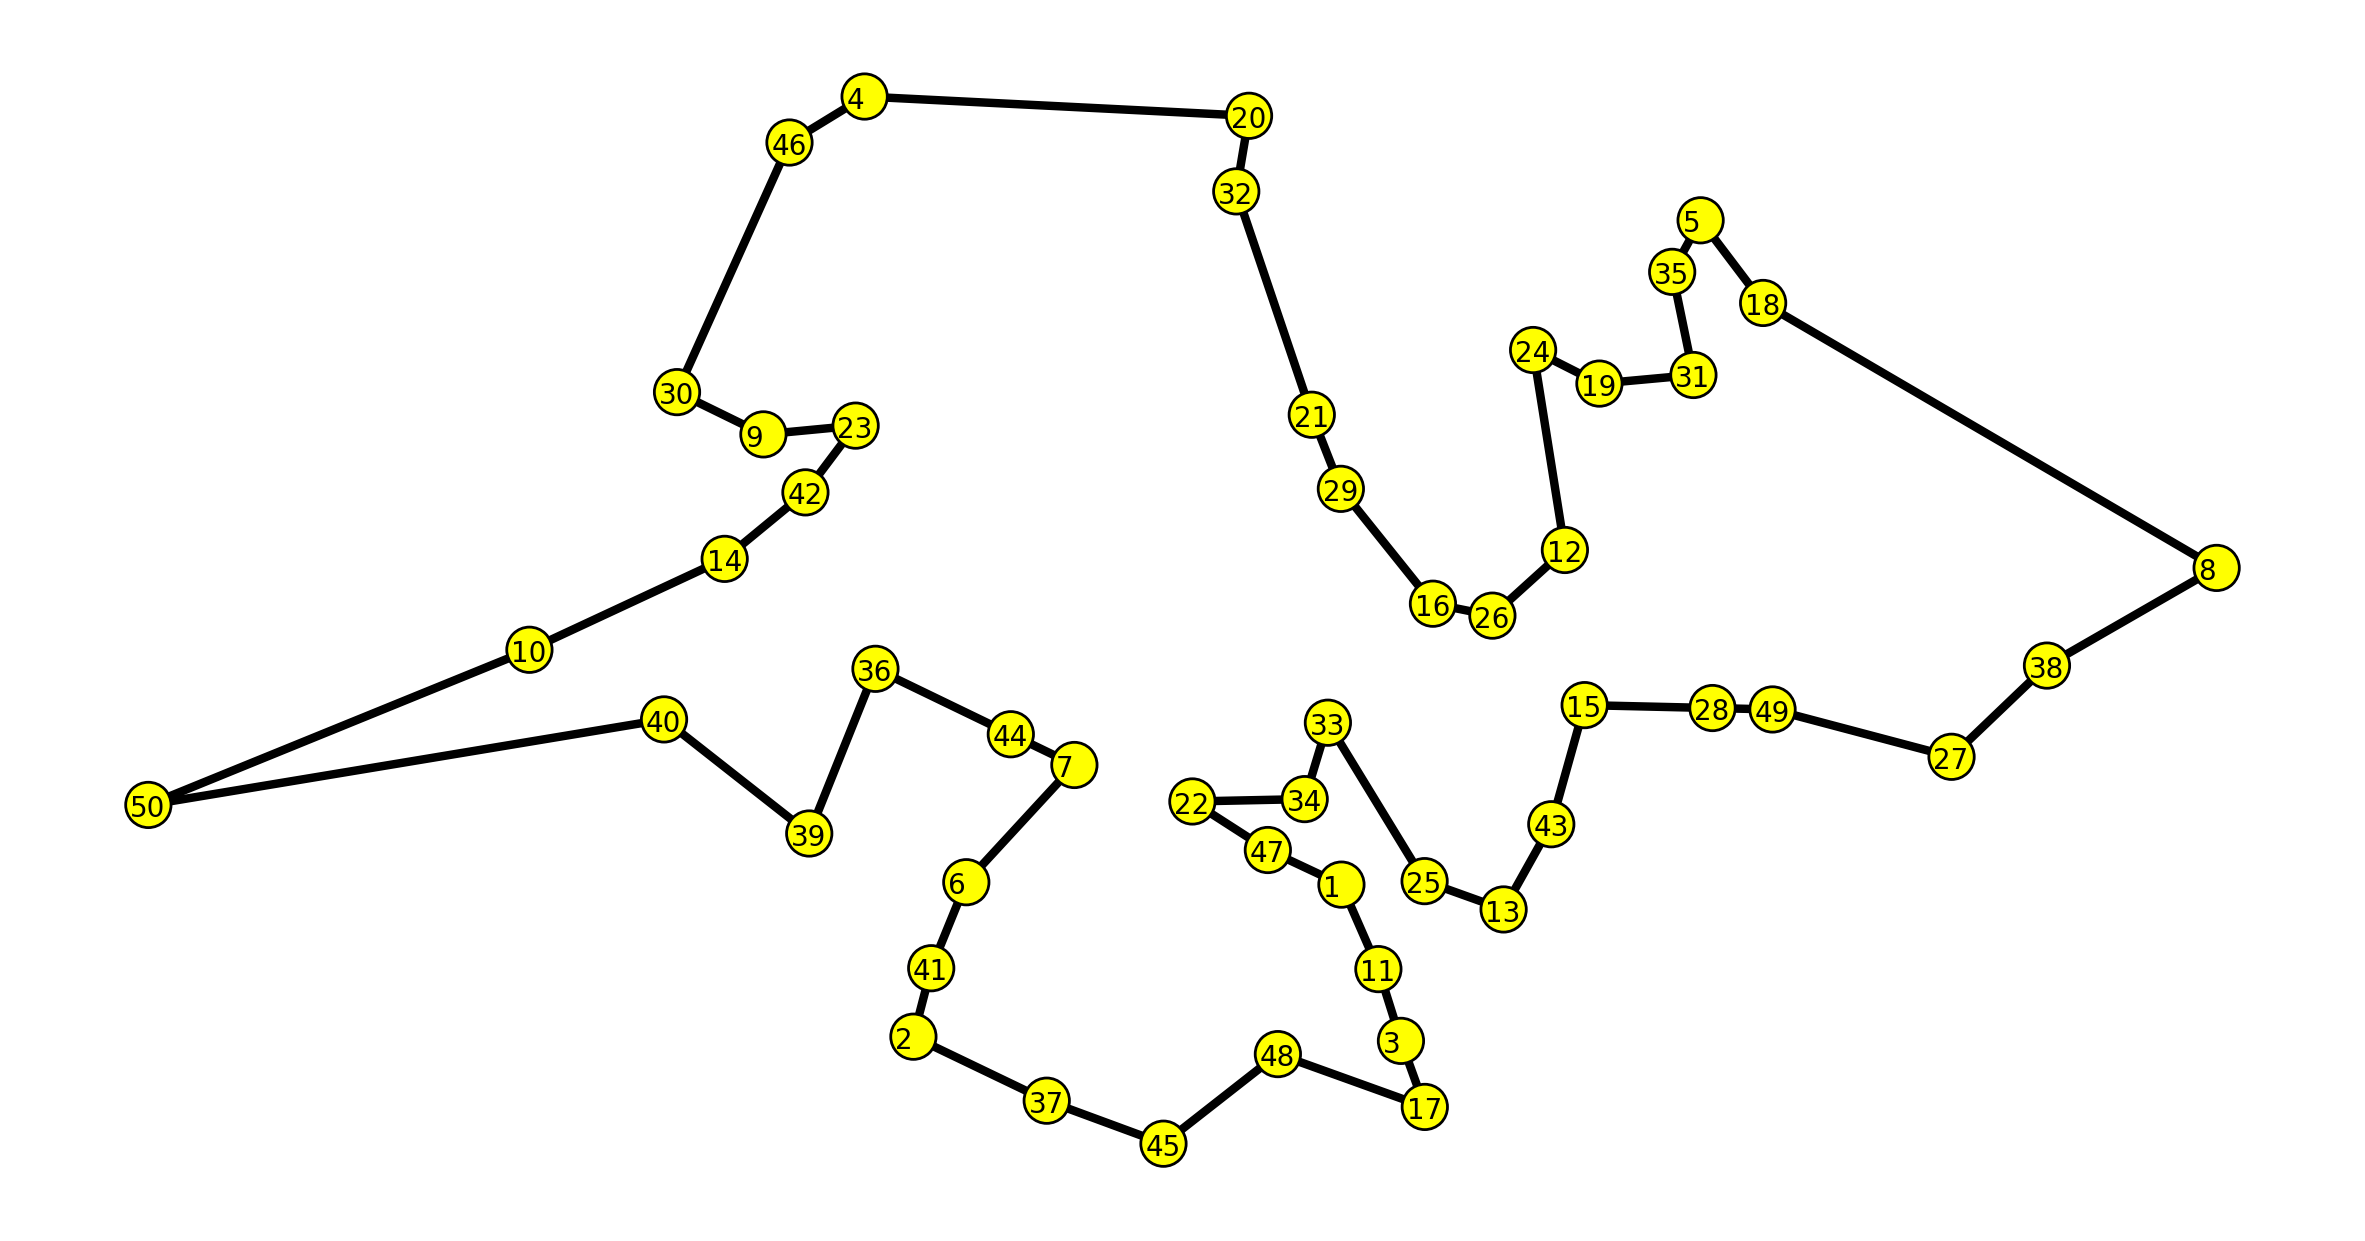

length of candidate TSP tour : 1281


In [5]:
# you can change this tour

candidate_tour = node_plot
# auxiliary function that plots out a candidate TSP tour 
#                     and computes its length

L2 = TSP_plot(candidate_tour,cities_C1,posn_C1,dist_C1)

print("length of candidate TSP tour : {}".format(L2))

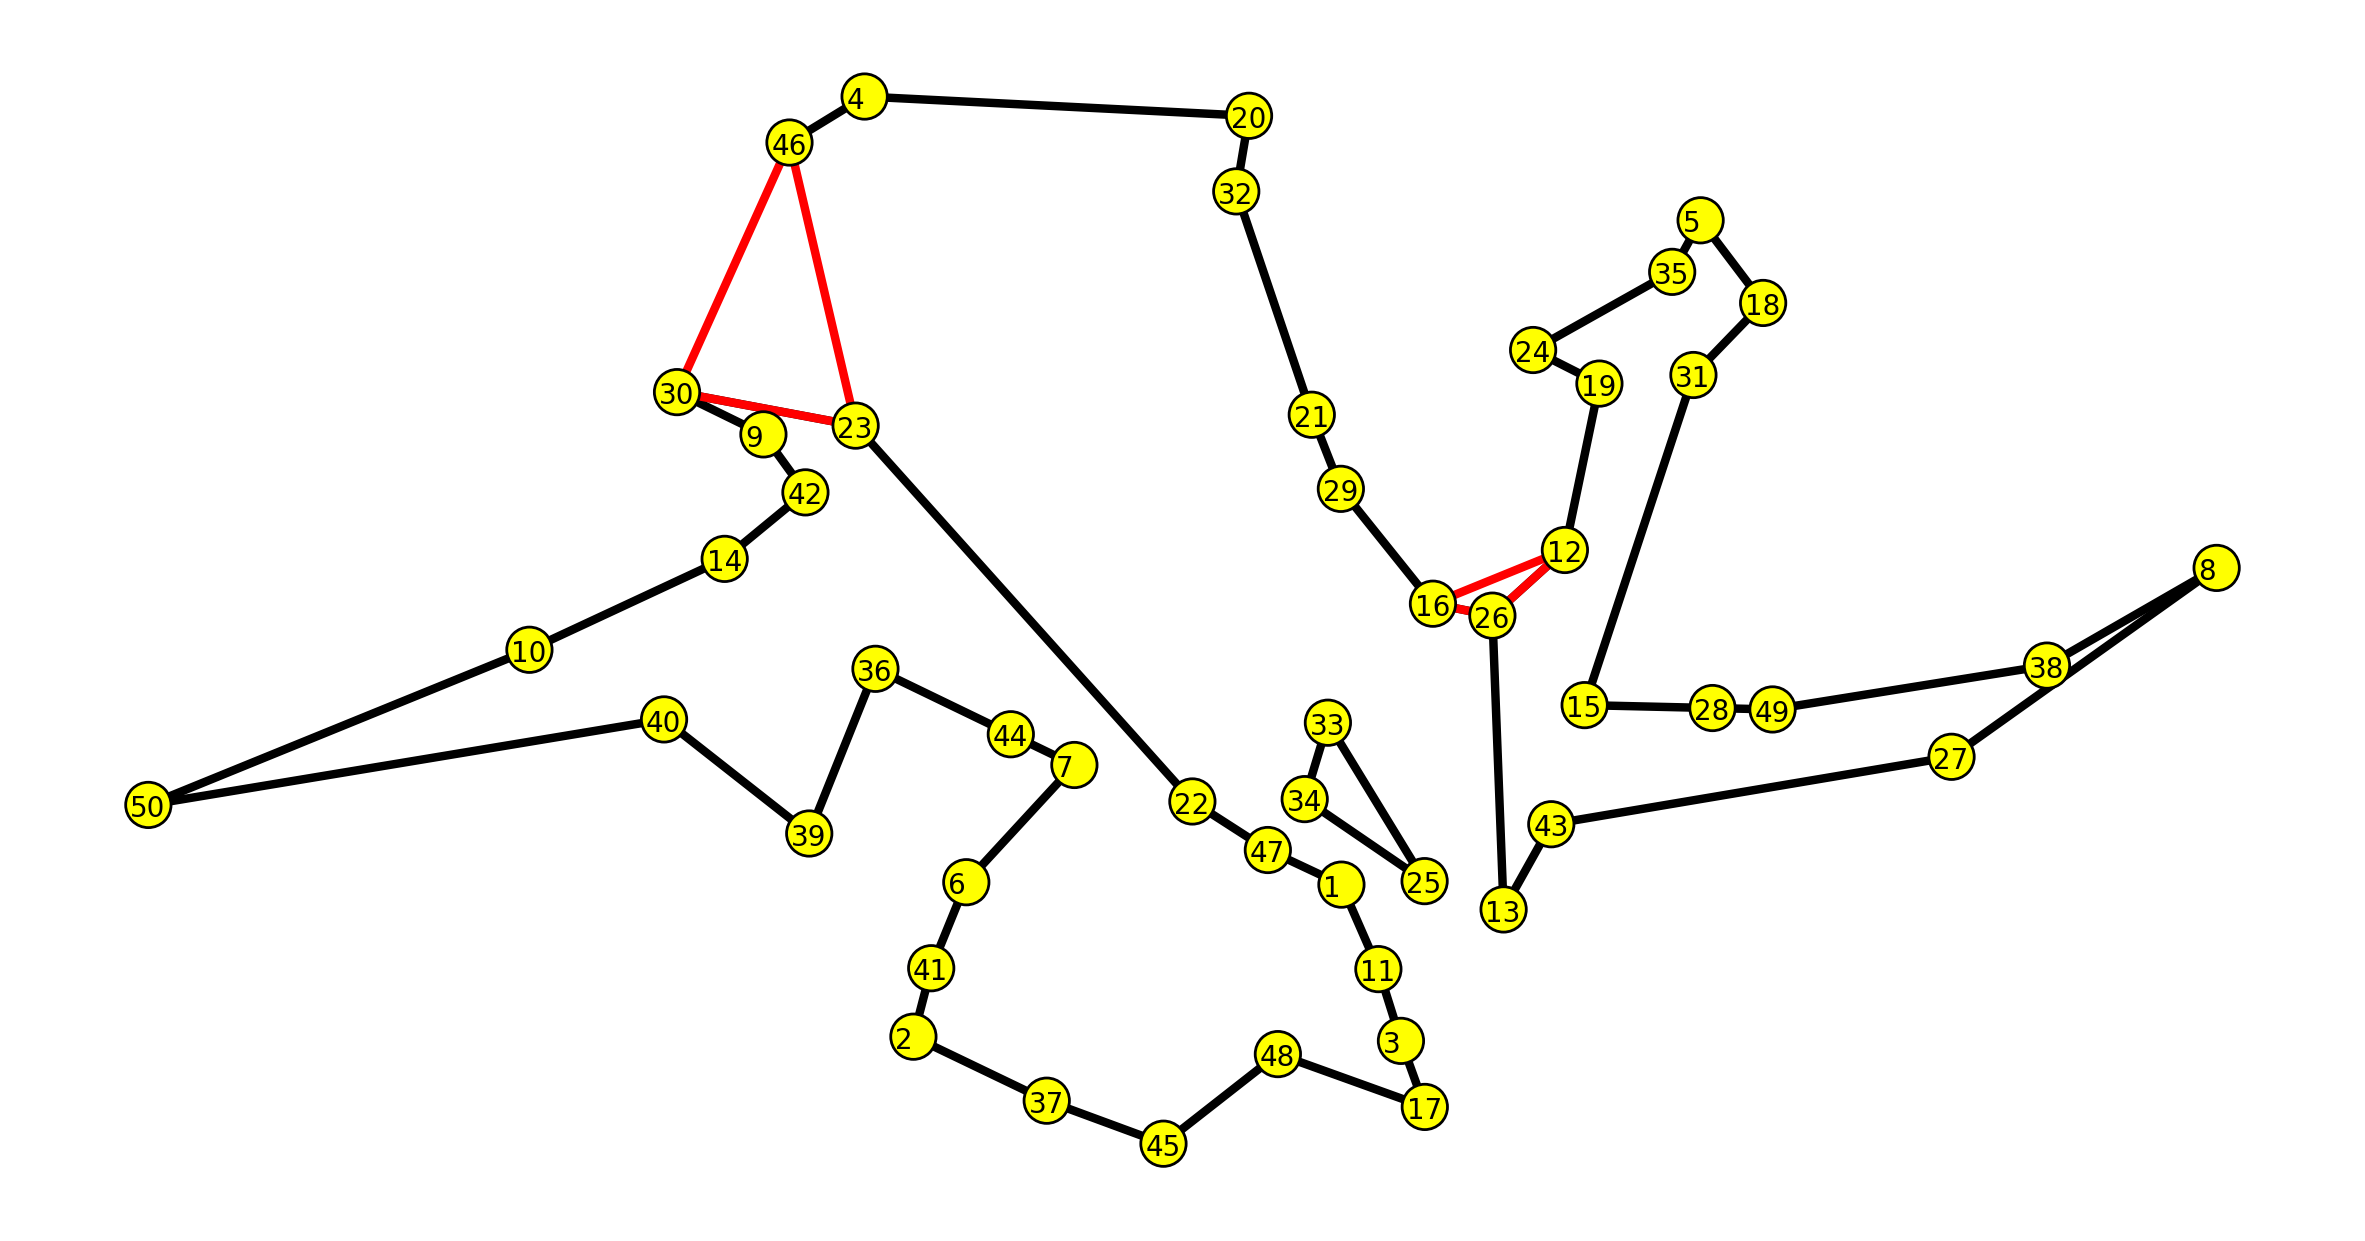

length of fractional TSP tour : 1545.5


In [13]:
# auxiliary function that plots out a fractional TSP tour 
#   E  : list of edges with values one, and plotted in black 
#   fE : list of edges with fractional values, and plotted in red 


E = [
    (46,4), (4, 20), (20, 32), (32, 21) , (21, 29) , (29, 16) , (16, 26) , (26, 12) , (12, 19) , (19, 24) , 
    (24, 35) , (35, 5) , (5, 18) , (18, 31) , (31, 15) , (15, 28) , (28, 49) , (49, 38) , (38, 8) , (8, 27) ,
    (27, 43) , (43, 13) , (13,26), (11, 3) , (3, 17) , (17, 48) , (48, 45) , (45, 37) , 
    (37, 2) , (2, 41) , (41, 6) , (6, 7) , (7, 44) ,
    (44, 36) , (36, 39) , (39, 40) , (40, 50) , (50, 10) , (10, 14) , (14, 42) , (42, 9) , (9, 30) , (30, 23) , (23, 22) ,
    (22, 47) , (47, 1) , (1, 11) , 
    (25, 34) , (34, 33) , (33, 25) ,
]

fE = [
    (16,26), (26,12), (16,12), (46,23), (46,30), (23,30)
    
]

LL = frac_TSP_plot(E,fE,cities_C1,posn_C1,dist_C1)

print("length of fractional TSP tour : {}".format(LL))


## TSP C2

In [6]:
from TSP_C2 import *
import pulp

print("number of cities : {}".format(len(cities_C2)))

SS = []
count = 0

while count < len(cities_C2):
    model = pulp.LpProblem("LPc1", pulp.LpMinimize)
    variable = {}
    x = []

    for i in range(1,len(cities_C2)+1):
        for j in range(i+1,len(cities_C2)+1):
            variable[(i,j)] = pulp.LpVariable('x'+'_'+str(i)+'_'+str(j), lowBound=0,cat='Integer')
            x.append((i,j))      
            #print((i,j),'x'+str(i)+str(j))

    #print(x)      
    model += pulp.lpSum(variable[i] * dist_C2[i] for i in x), "Z"

    for i in range(1,len(cities_C2)+1):
        y = []
        for j in range(1,len(cities_C2)+1):
            if i == j:
                continue
            elif i > j:
                y.append((j,i))
            else:
                y.append((i,j))
        model += pulp.lpSum(variable[i] for i in y) == 2, "constraint%s"%i

    if SS:
        for i in range(len(SS)):
            z = []
            for j in SS[i]:
                for k in [l for l in cities_C2 if l not in SS[i]]:
                    #print(j,k)
                    if k > j:
                        z.append((j,k))
                    else:
                        z.append((k,j))
            model += pulp.lpSum(variable[i] for i in z) >= 2, "constraint%s"%(i+len(cities_C2)+1)

    #print(model)

    model.solve()
    print("Z  : {}".format(pulp.value(model.objective)))

    subtour_1 = []
    subtour_2 = []
    for i in range(1,len(cities_C2)+1):
        for j in range(i+1,len(cities_C2)+1):
            if variable[(i,j)].varValue == 1:
                #print('x'+'_'+str(i)+'_'+str(j)+" : {}".format(variable[(i,j)].varValue))
                subtour_1.append((i,j))
            elif variable[(i,j)].varValue == 2:
                subtour_2.append((i,j))

    subtour_remove = []
    SS_value = []

    # get subtour nodes with number > 2
    while len(subtour_remove) < len(subtour_1):
        node = []
        node.append([l for l in subtour_1 if l not in subtour_remove][0][0])
        node.append([l for l in subtour_1 if l not in subtour_remove][0][1])
        for i in [l for l in subtour_1 if l not in subtour_remove]:
            for j in [l for l in subtour_1 if l not in subtour_remove]:
                if j[0] in node and j[1] in node:
                    subtour_remove.append(j)
                elif j[0] in node and j[1] not in node:
                    node.append(j[1])
                    subtour_remove.append(j)
                elif j[1] in node and j[0] not in node:
                    node.append(j[0])
                    subtour_remove.append(j)
        SS_value.append(node)

    # get subtour nodes with number = 2 
    for i in subtour_2:
        node = []
        node.append(i[0])
        node.append(i[1])
        SS_value.append(node)

    count = max(len(x) for x in SS_value)
    #SS.append(random.choice(temp))    
    SS.append(random.choice([l for l in SS_value if l not in SS]))
    #SS.append(random.choice(SS_value))
    
    # print(SS)
    # print(SS_value)
    # print(count)

number of cities : 70
Z  : 1102.0
Z  : 1104.0
Z  : 1106.0
Z  : 1123.0
Z  : 1149.0
Z  : 1156.0
Z  : 1158.0
Z  : 1160.0
Z  : 1163.0
Z  : 1169.0
Z  : 1170.0
Z  : 1180.0
Z  : 1181.0
Z  : 1188.0
Z  : 1190.0
Z  : 1190.0
Z  : 1192.0
Z  : 1204.0
Z  : 1211.0
Z  : 1217.0
Z  : 1218.0
Z  : 1218.0
Z  : 1233.0
Z  : 1242.0
Z  : 1242.0
Z  : 1245.0
Z  : 1268.0
Z  : 1269.0
Z  : 1272.0
Z  : 1273.0
Z  : 1281.0
Z  : 1287.0
Z  : 1289.0
Z  : 1289.0
Z  : 1293.0
Z  : 1343.0
Z  : 1349.0
Z  : 1350.0
Z  : 1352.0
Z  : 1353.0
Z  : 1366.0
Z  : 1416.0
Z  : 1418.0
Z  : 1421.0
Z  : 1434.0
Z  : 1435.0
Z  : 1437.0
Z  : 1438.0
Z  : 1439.0
Z  : 1441.0
Z  : 1443.0
Z  : 1443.0
Z  : 1444.0
Z  : 1445.0
Z  : 1446.0
Z  : 1449.0
Z  : 1449.0


In [7]:
#print(SS_value)
#print(subtour_1)
#print(subtour_2)
#print(SS)
node_plot = []
node_plot.append(subtour_1[0][0])
node_plot.append(subtour_1[0][1])
subremove = []
subremove.append(subtour_1[0])
while len(node_plot) < len(cities_C2):
    for j in [l for l in subtour_1 if l not in subremove]:
        if j[0] == node_plot[-1]:
            node_plot.append(j[1])
            subremove.append(j)
            break
        elif j[1] == node_plot[-1]:
            node_plot.append(j[0])
            subremove.append(j)
            break
    
print(node_plot)

[1, 18, 31, 23, 22, 70, 69, 40, 64, 8, 9, 33, 13, 3, 29, 11, 26, 6, 66, 63, 55, 36, 37, 45, 24, 61, 30, 19, 54, 21, 32, 65, 17, 12, 4, 56, 15, 68, 46, 16, 57, 44, 35, 34, 52, 5, 25, 47, 14, 20, 7, 10, 38, 50, 28, 41, 59, 48, 2, 58, 53, 43, 49, 67, 39, 62, 51, 60, 27, 42]


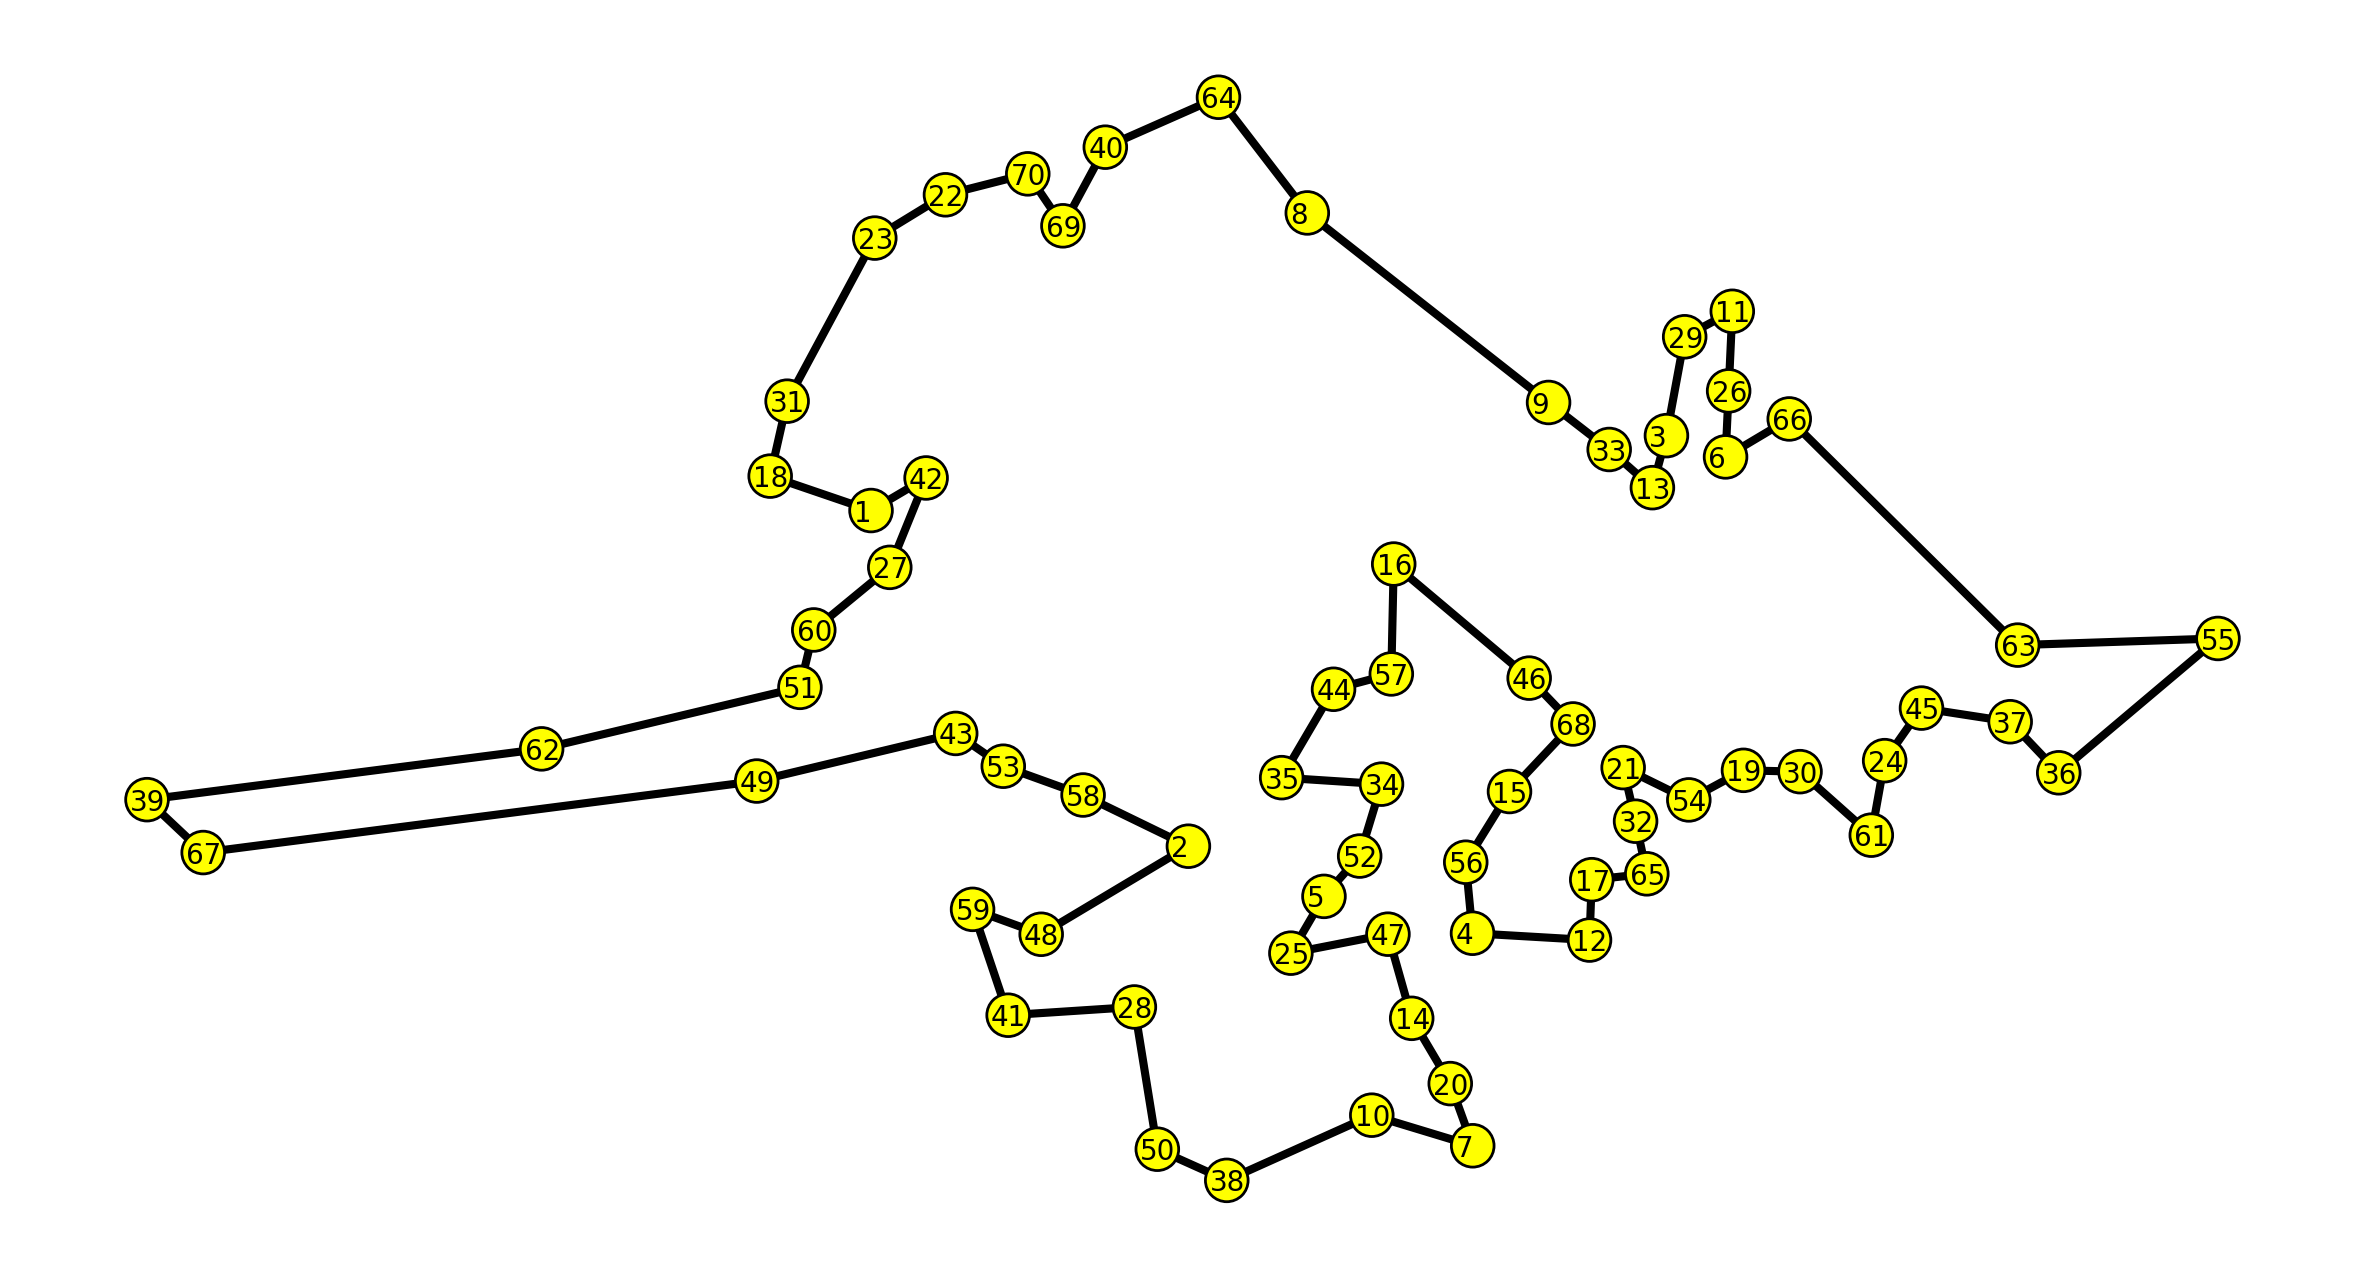

length of candidate TSP tour : 1449


In [8]:
candidate_tour = node_plot

L2 = TSP_plot(candidate_tour,cities_C2,posn_C2,dist_C2)

print("length of candidate TSP tour : {}".format(L2))

number of cities : 70


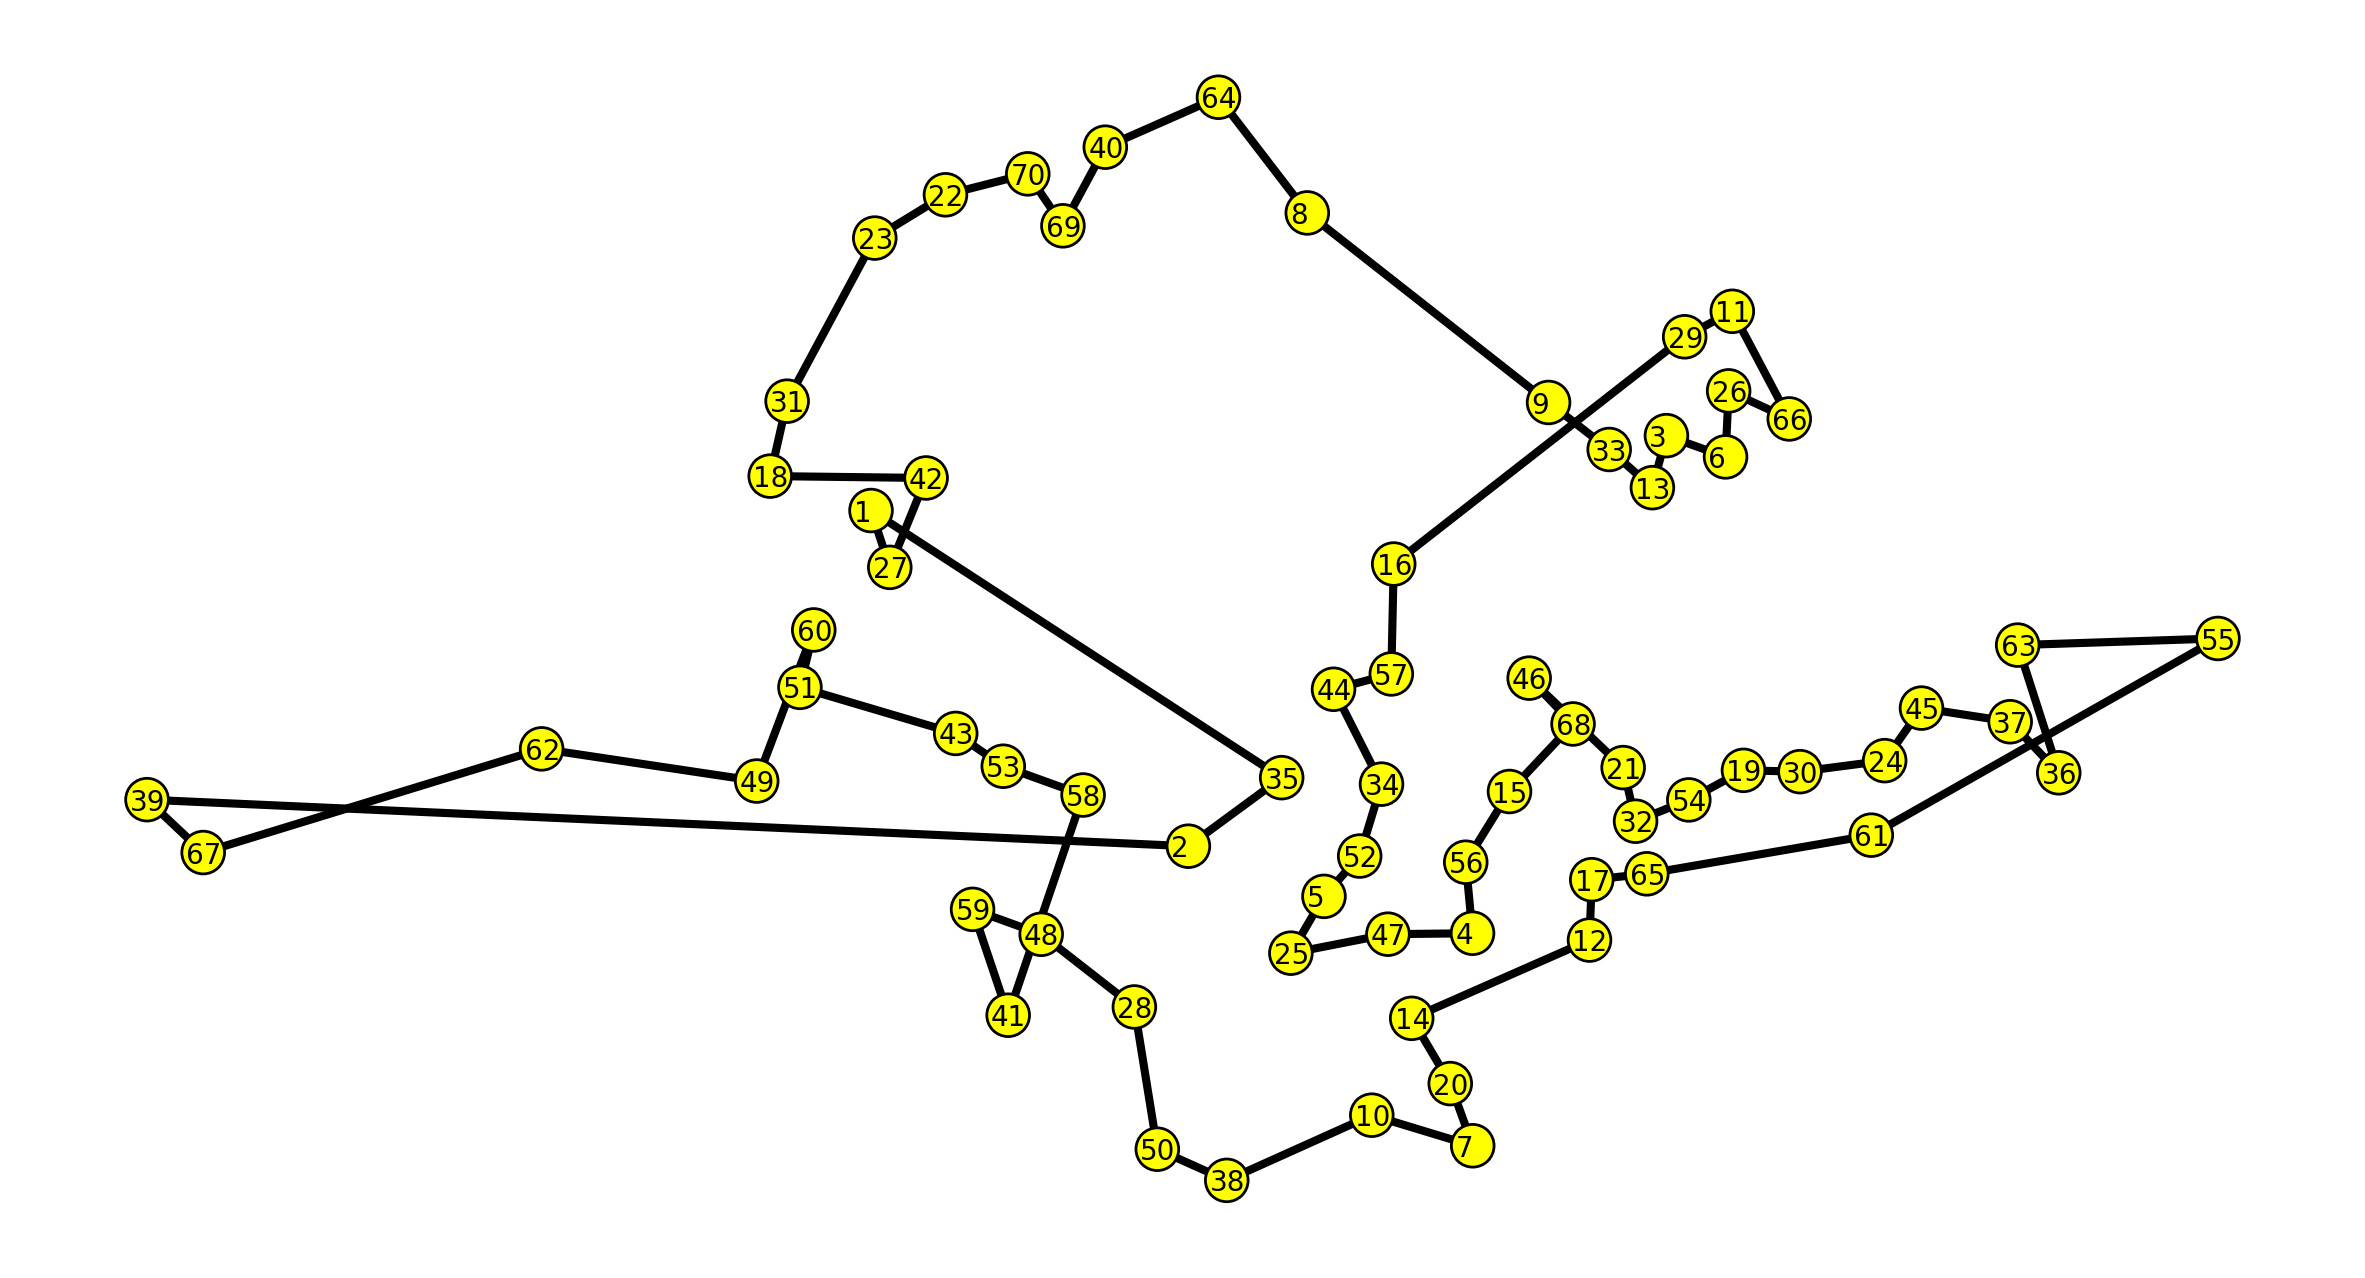

length of candidate TSP tour : 1707


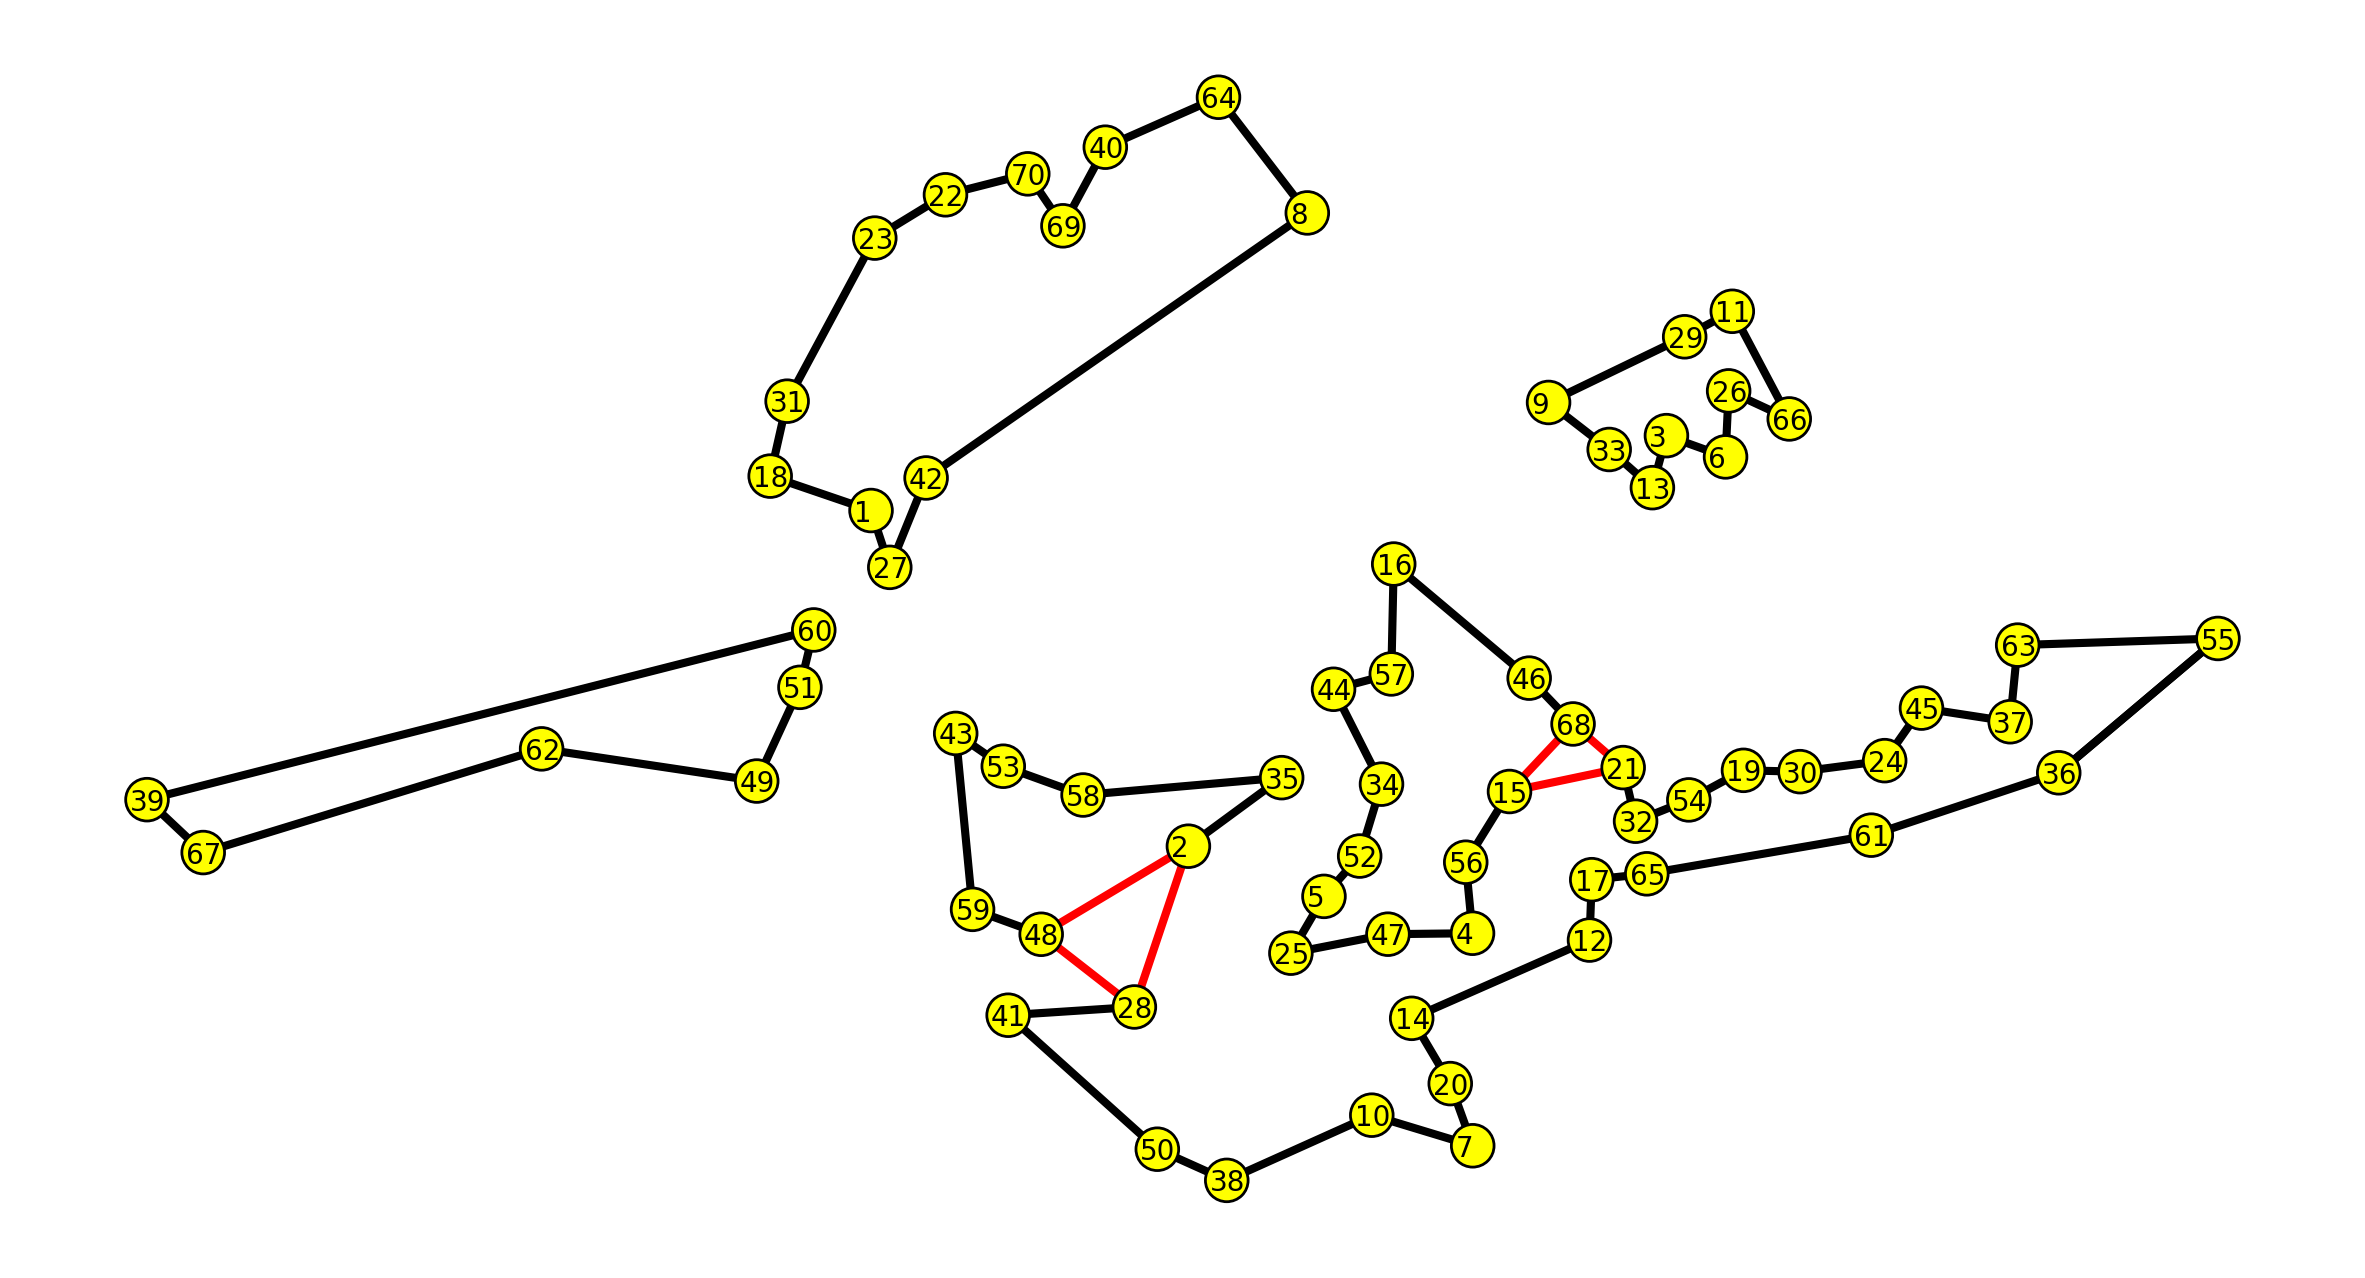

length of fractional TSP tour : 1581.5


In [14]:
# Question C2

from TSP_C2 import *
import pulp

print("number of cities : {}".format(len(cities_C2)))

# you can change this tour

candidate_tour = [
     1, 27, 42, 18, 31, 23, 22, 70, 69, 40, 
    64,  8,  9, 33, 13,  3,  6, 26, 66, 11, 
    29, 16, 57, 44, 34, 52,  5, 25, 47,  4, 
    56, 15, 68, 46, 21, 32, 54, 19, 30, 24,
    45, 37, 36, 63, 55, 61, 65, 17, 12, 14,
    20,  7, 10, 38, 50, 28, 48, 59, 41, 58, 
    53, 43, 51, 60, 49, 62, 67, 39, 2, 35
]


# auxiliary function that plots out a candidate TSP tour 
#                     and computes its length

L2 = TSP_plot(candidate_tour,cities_C2,posn_C2,dist_C2)

print("length of candidate TSP tour : {}".format(L2))

# auxiliary function that plots out a fractional TSP tour 
#   E  : list of edges with values one, and plotted in black 
#   fE : list of edges with fractional, and plotted in red 


E = [
    (18,1), (1,27), (27,42), (18,31), (31,23), (23,22), (22,70), (70,69), (69,40), (40,64), (64,8), (8,42),
    (9,33), (33,13), (13,3), (3,6), (6,26), (26,66), (66,11), (11,29), (29,9),
    (16,57), (57,44), (44,34), (34,52), (52,5), (5,25), (25,47), (47,4), (4,56), (56,15), (68,46), (46,16),
    (21,32),  (32,54), (54,19), (19,30), (30,24), (24,45), (45,37), (37,63), (36,55), (63,55), (55,36), (36,61),
    (61,65), (65,17), (17,12), (12,14), (14,20), (20,7), (7,10), (10,38), (38,50), (41,28), (48,59),
    (59,43), (41,50), (58,53), (53,43), 
    (51,60), (51,49), (49,62), (62,67), (67,39), (39,60), (2,35),(35,58),
]

fE = [
    (15,68), (15,21), (21,68), (2,48), (28,48), (2,28),
]

LL = frac_TSP_plot(E,fE,cities_C2,posn_C2,dist_C2)


print("length of fractional TSP tour : {}".format(LL))



# WRITE YOUR CODE HERE

---

## Auxilliary Plotting Functions

In [4]:
# Auxiliary function that
# plots out a candidate TSP tour 
# and computes its length


import matplotlib.pyplot as plt
import math as math
from matplotlib import collections as mc


def TSP_plot(tour,cities,posn,dist):
    fig = plt.figure()
    fig.set_dpi(200)
    fig.set_size_inches(15,30)

    r = 400
    xoffset=-0.8*r
    yoffset=-0.5*r
    displayname = 0

    for city in cities:

        center = posn[city]

        circle = plt.Circle(center, r, ec='black',fc='yellow', zorder = 9)
        plt.text(center[0]+xoffset,center[1]+yoffset,city, zorder=10)
        plt.gca().add_patch(circle)
    
    N = len(cities)
    
    L = 0
    for i in range(N):
        u = tour[i]
        if i<N-1: v = tour[i+1]
        else: v = tour[0]
            
        ux = posn[u][0]
        uy = posn[u][1]
        vx = posn[v][0]
        vy = posn[v][1]
        plt.arrow(ux,uy,vx-ux,vy-uy,color='k',width=100,head_width=0, zorder=1)
        
        L += dist[(u,v)]
        
    plt.axis('scaled')
    plt.axis('off')
    plt.show()
    
    return L

In [11]:
# Auxiliary functions that plots out a fractional TSP tour 
#   E  : list of edges with values one, and plotted in black 
#   fE : list of edges with fractional, and plotted in red 

import matplotlib.pyplot as plt
import math as math
from matplotlib import collections  as mc


def frac_TSP_plot(E,fE,cities,posn,dist):
    fig = plt.figure()
    fig.set_dpi(200)
    fig.set_size_inches(15,30)

    r = 400
    xoffset=-0.8*r
    yoffset=-0.5*r
    displayname = 0

    for city in cities:

        center = posn[city]

        circle = plt.Circle(center, r, ec='black',fc='yellow', zorder = 9)
        plt.text(center[0]+xoffset,center[1]+yoffset,city, zorder=10)
        plt.gca().add_patch(circle)
    
    L = 0
    
    for (u,v) in E:
        ux = posn[u][0]
        uy = posn[u][1]
        vx = posn[v][0]
        vy = posn[v][1]
        plt.arrow(ux,uy,vx-ux,vy-uy,color='k',width=100,head_width=0, zorder=1)
        
        L += dist[(u,v)]
    
    for (u,v) in fE:
        ux = posn[u][0]
        uy = posn[u][1]
        vx = posn[v][0]
        vy = posn[v][1]
        plt.arrow(ux,uy,vx-ux,vy-uy,color='red',width=100,head_width=0, zorder=1)
        
        L += 0.5*dist[(u,v)]
    
        
    plt.axis('scaled')
    plt.axis('off')
    plt.show()
    
    return L